# <b><u> Project Title : Mobile Price Range Prediction </u></b>

## <b> Problem Description </b>

### In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

## <b> Data Description </b>

* ### Battery_power - Total energy a battery can store in one time measured in mAh
* ### Blue - Has bluetooth or not
* ### Clock_speed - speed at which microprocessor executes instructions
* ### Dual_sim - Has dual sim support or not
* ### Fc - Front Camera mega pixels
* ### Four_g - Has 4G or not
* ### Int_memory - Internal Memory in Gigabytes
* ### M_dep - Mobile Depth in cm
* ### Mobile_wt - Weight of mobile phone
* ### N_cores - Number of cores of processor
* ### Pc - Primary Camera mega pixels
* ### Px_height - Pixel Resolution Height
* ### Px_width - Pixel Resolution Width
* ### Ram - Random Access Memory in Mega Bytes
* ### Sc_h - Screen Height of mobile in cm
* ### Sc_w - Screen Width of mobile in cm
* ### Talk_time - longest time that a single battery charge will last when you are
* ### Three_g - Has 3G or not
* ### Touch_screen - Has touch screen or not
* ### Wifi - Has wifi or not
* ### Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scaling, splitting, cross-validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

# feature extraction
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier

# evaluation metrics
from sklearn.metrics import confusion_matrix , plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading a data file
mob_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My_Capstone_Projects/data_mobile_price_range.csv')

In [ ]:
mob_df.head()                                        # Overview of dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
mob_df.shape                                              # returns dimensionality of the DataFrame

(2000, 21)

In [ ]:
mob_df.describe()                                         # generate descriptive statistic

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
 # creating copy of dataframe
mob_price_df = mob_df.copy()

In [ ]:
# checking null values
mob_price_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Handling Discrepancy

In [ ]:
# check in how many rows sc_w is 0
mob_price_df[mob_price_df['sc_w']==0].shape[0]

180

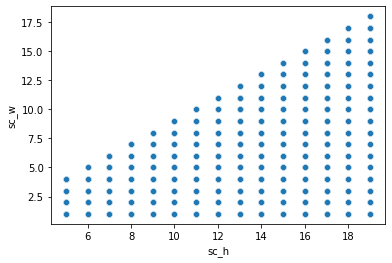

In [ ]:
# relation between sc_h and sc_w
sns.scatterplot(mob_price_df[mob_price_df['sc_w']!=0]['sc_h'],mob_price_df[mob_price_df['sc_w']!=0]['sc_w'])
plt.show()

As we can see in the above plot, for each value of 'sc_h' there are multiple values of 'sc_w', so our best shot for guessing the values of the 'sc_w' would be taking an aggegate of all available values 'sc_w' for all values of 'sc_h'.

In [ ]:
import math

sc_wh = mob_price_df[mob_price_df['sc_w']!=0].groupby('sc_h')['sc_w'].mean()
scwh_dict = {key:math.ceil(value) for key,value in zip(sc_wh.index, sc_wh.values)}


In [ ]:
sc_h = list(mob_price_df['sc_h'])
sc_w = list(mob_price_df['sc_w'])

for i in range(len(sc_w)):
    if sc_w[i] == 0:
        sc_w[i] = scwh_dict[sc_h[i]]

mob_price_df['sc_h'] = sc_h
mob_price_df['sc_w'] = sc_w

In [ ]:
mob_price_df[mob_price_df['sc_w']==0].shape[0]

0

In [ ]:
mob_price_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# count of each class
mob_price_df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
mob_price_df['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

1010 mobiles have bluetooth and 990 don't have bluetooth

In [ ]:
mob_price_df['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

1019 mobiles support dual sim slot

In [ ]:
mob_price_df['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

1043 mobiles have four_g facility and 957 don't have four_g

In [ ]:
mob_price_df['m_dep'].value_counts()

0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: m_dep, dtype: int64

dataset contains 10 different mobile-depths 

In [ ]:
mob_price_df['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

there are 8 different cores of processors

# **EDA**

In [ ]:
column=mob_price_df.columns

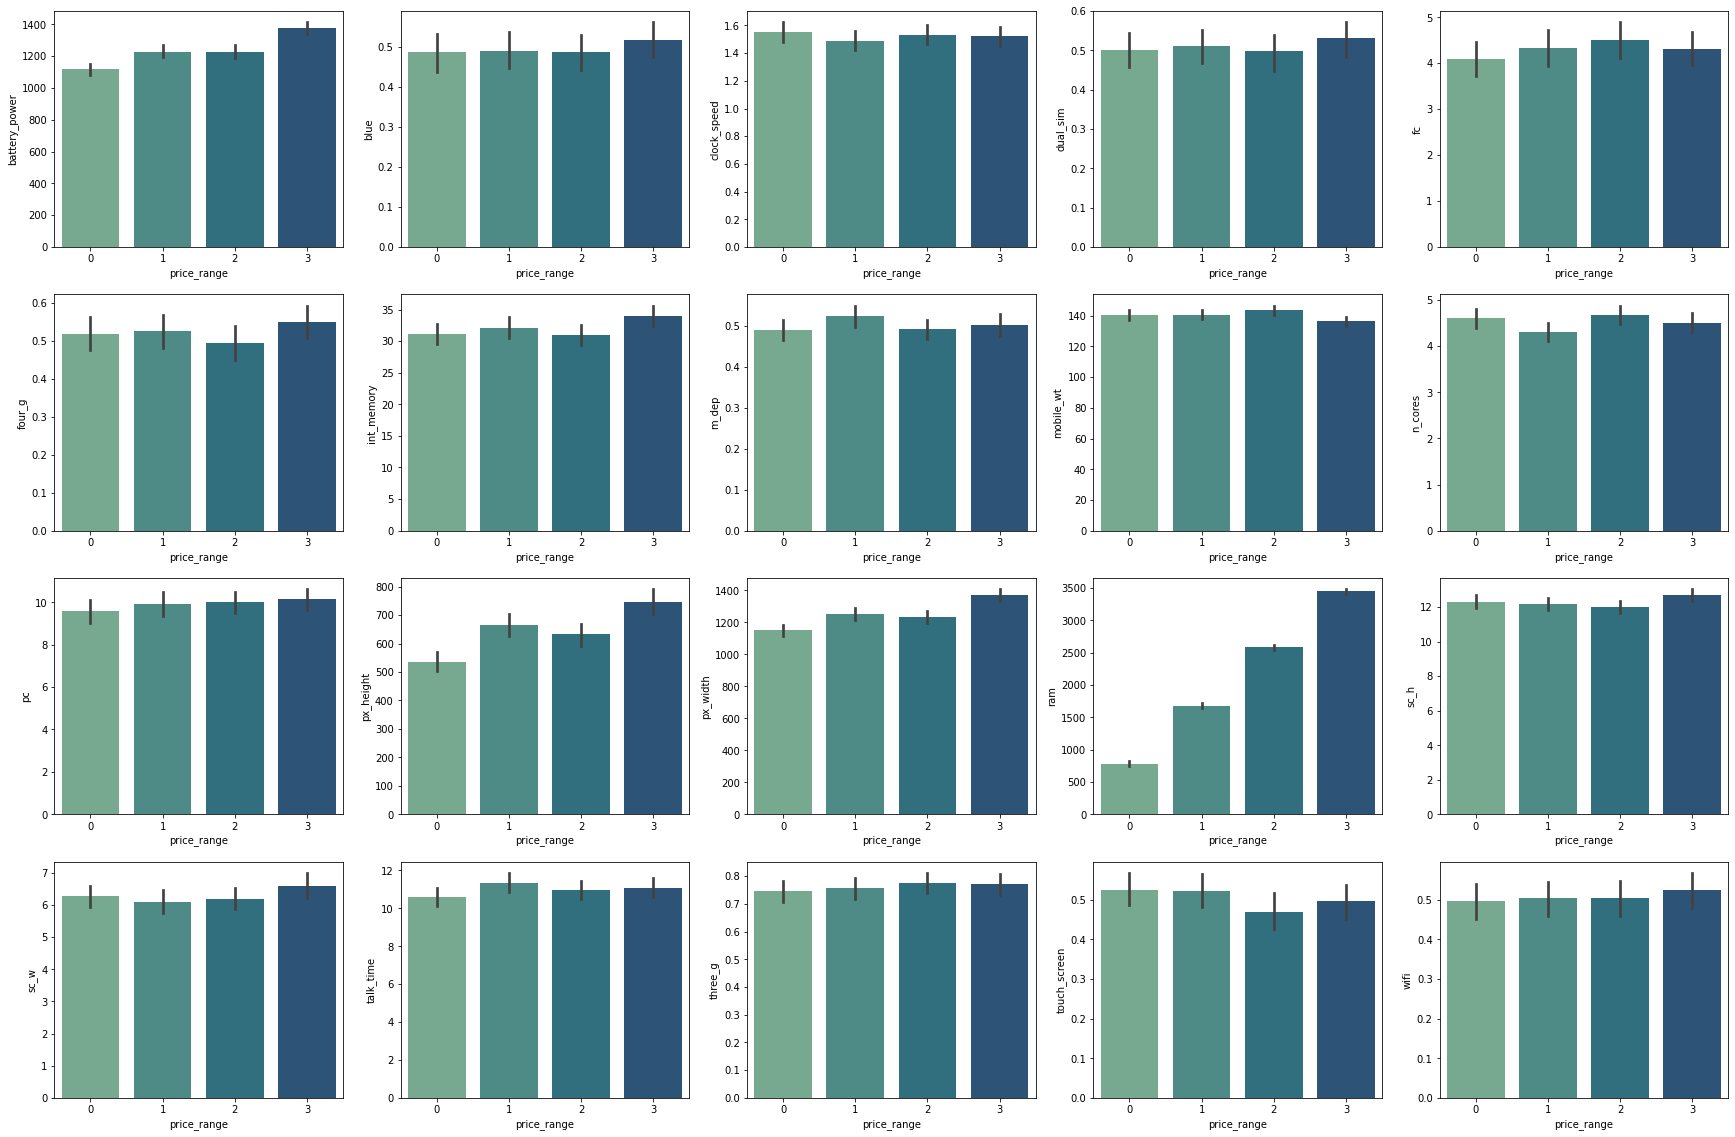

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(30, 20))
k=0
for i in range(4):
  for j in range(5):
 
      sns.barplot(ax=axes[i, j],data=mob_price_df,x='price_range',y=column[k],palette = 'crest')
 
      k=k+1

## **Plotting Relation between Price Range & three_g**

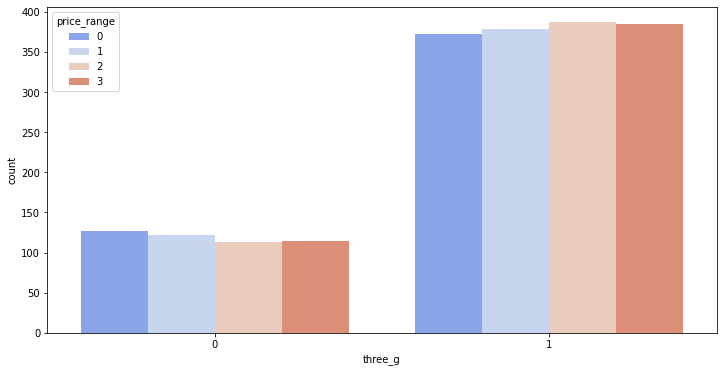

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(mob_price_df['three_g'] , hue = mob_price_df['price_range'] , palette = 'coolwarm')
plt.show()

## **Plotting Relation between Price Range & four_g**

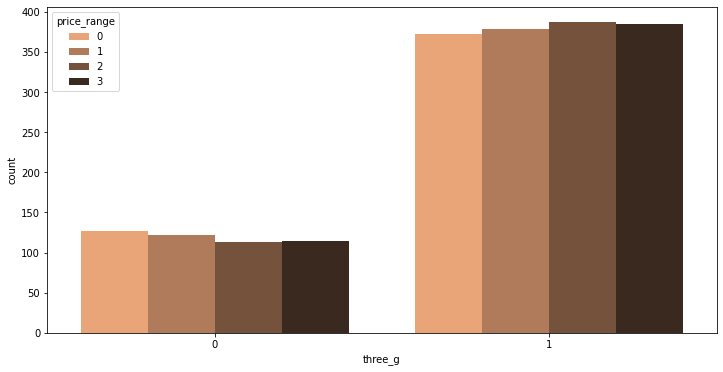

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(mob_price_df['three_g'] , hue = mob_price_df['price_range'] , palette = 'copper_r')
plt.show()

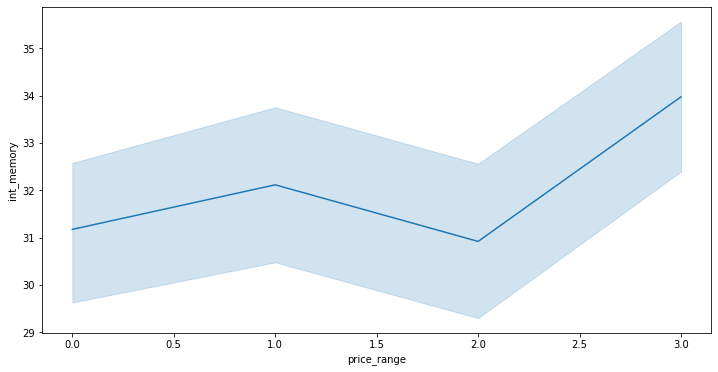

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'price_range' , y = 'int_memory' , data = mob_price_df )
plt.show()

There is sharp increase in internal memory for very high prices

## **Correlation**

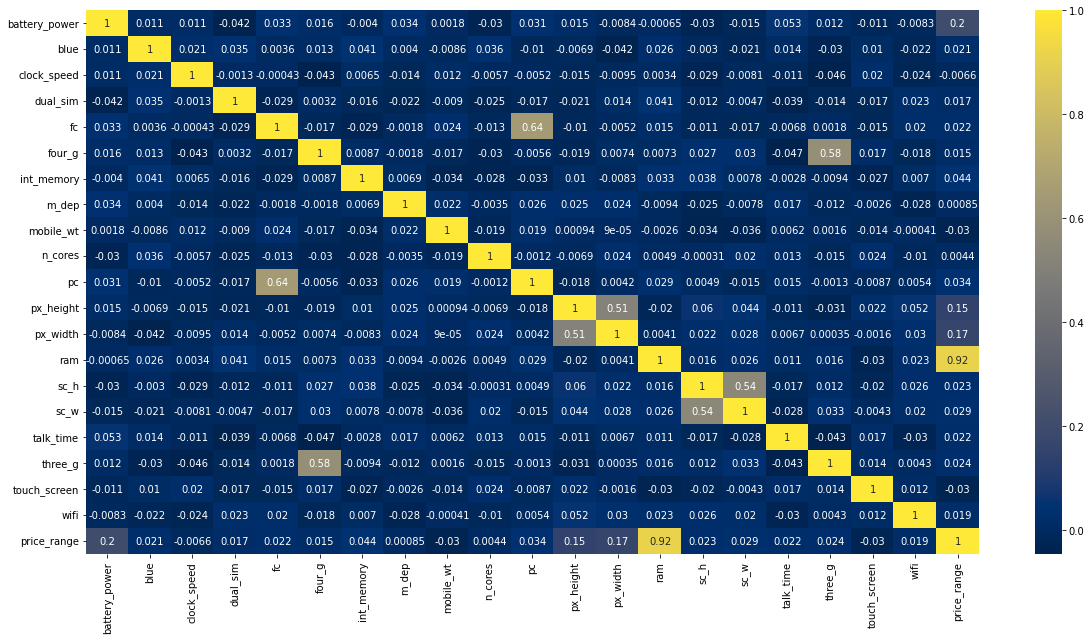

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(mob_price_df.corr(), cmap='cividis', annot=True)


1. ram is highly correlated with our price range. May be one the most important factor in determining the price.
2. pc is correlated with fc. 
3. three_g and four_g are moderately correlated.
4. px_width and px_height are moderately correlated.
5. sc_h and sc_w are moderately correlated.












## **Splitting the data**

In [ ]:
#independent variables
X = mob_price_df.drop(columns=['price_range'])

In [ ]:
#dependent variable
y = mob_price_df['price_range']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42, stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1400, 20)
(600, 20)


## **Logistic Regression**

In [ ]:
logistic_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Get the predicted probabilities
train_preds_proba = logistic_reg.predict_proba(X_train)
test_preds_proba = logistic_reg.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_pred = logistic_reg.predict(X_train)
test_class_pred = logistic_reg.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
print("The accuracy on train data is ", train_accuracy)

test_accuracy = accuracy_score(test_class_pred,y_test)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8
The accuracy on test data is  0.7266666666666667


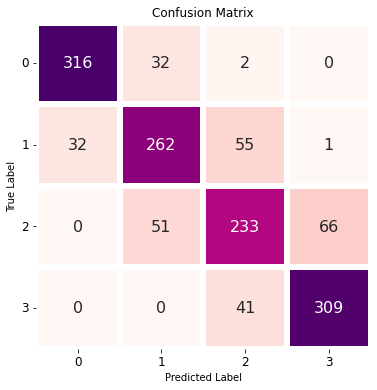

In [ ]:
# confusion matrix for train data

labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_train, train_class_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="RdPu", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

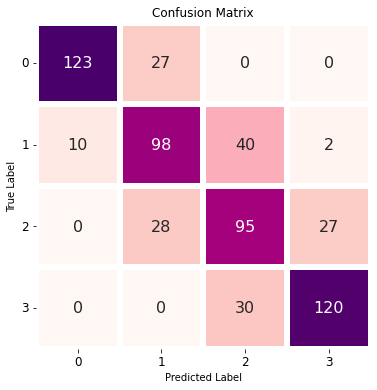

In [ ]:
# confusion matrix for test data

cm = confusion_matrix(y_test, test_class_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="RdPu", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
#predicting 
y_pred_proba = logistic_reg.predict_proba(X_test)

In [ ]:
# rocauc score
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

0.9300888888888889

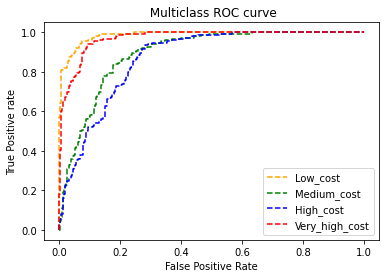

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title(' Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
print(classification_report(y_train,train_class_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       350
           1       0.76      0.75      0.75       350
           2       0.70      0.67      0.68       350
           3       0.82      0.88      0.85       350

    accuracy                           0.80      1400
   macro avg       0.80      0.80      0.80      1400
weighted avg       0.80      0.80      0.80      1400



In [ ]:
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       150
           1       0.64      0.65      0.65       150
           2       0.58      0.63      0.60       150
           3       0.81      0.80      0.80       150

    accuracy                           0.73       600
   macro avg       0.74      0.73      0.73       600
weighted avg       0.74      0.73      0.73       600



## **Random Forest**

In [ ]:
# Hyperparameter tuning

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_classifier,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy', verbose=2)

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=80)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
#best parameters for the data
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [ ]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)

In [ ]:
# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
len(train_preds)

1400

In [ ]:
train_class_preds

array([2, 2, 0, ..., 3, 0, 0])

In [ ]:
test_class_preds

array([3, 3, 1, 2, 3, 3, 0, 0, 2, 3, 1, 1, 0, 2, 0, 1, 3, 1, 3, 2, 3, 2,
       1, 0, 3, 1, 1, 3, 3, 3, 2, 3, 0, 1, 2, 2, 1, 2, 1, 2, 3, 1, 2, 3,
       0, 2, 3, 3, 1, 3, 1, 0, 0, 3, 0, 3, 0, 1, 2, 3, 3, 2, 1, 3, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 3, 3, 0, 1, 1, 0, 2, 0, 2, 1, 3, 0, 2, 0, 1,
       3, 2, 1, 3, 0, 3, 3, 3, 3, 3, 0, 0, 1, 0, 2, 1, 1, 3, 1, 3, 3, 2,
       1, 1, 0, 2, 1, 2, 0, 0, 3, 1, 2, 1, 0, 0, 1, 1, 1, 3, 0, 0, 3, 2,
       0, 0, 0, 0, 1, 1, 1, 3, 3, 0, 2, 0, 3, 3, 1, 3, 2, 0, 3, 2, 2, 3,
       2, 1, 0, 3, 1, 1, 3, 1, 0, 3, 0, 0, 3, 1, 0, 2, 3, 2, 0, 1, 1, 2,
       0, 1, 2, 1, 3, 0, 1, 3, 2, 2, 0, 3, 3, 2, 0, 2, 2, 0, 3, 2, 0, 1,
       2, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 2, 3, 0, 2, 3, 1, 2, 3, 1, 3, 2,
       3, 0, 2, 2, 1, 1, 2, 3, 0, 3, 1, 0, 2, 3, 3, 1, 3, 0, 1, 3, 2, 2,
       0, 1, 2, 0, 1, 2, 3, 0, 3, 0, 3, 0, 2, 3, 3, 1, 1, 2, 1, 0, 1, 0,
       3, 2, 2, 2, 2, 3, 1, 3, 3, 1, 0, 3, 0, 2, 1, 2, 3, 1, 1, 3, 3, 1,
       0, 3, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2,

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
print("The accuracy on train dataset is", train_accuracy)

test_accuracy = accuracy_score(y_test,test_class_preds)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8735714285714286
The accuracy on test dataset is 0.8016666666666666


In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [ ]:
train_cm

array([[337,  13,   0,   0],
       [ 40, 275,  35,   0],
       [  0,  62, 264,  24],
       [  0,   0,   3, 347]])

In [ ]:
test_cm

array([[143,   7,   0,   0],
       [ 12, 113,  25,   0],
       [  0,  33,  83,  34],
       [  0,   0,   8, 142]])

In [ ]:
cm = confusion_matrix(y_train,train_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="RdPu", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
cm = confusion_matrix(y_test, test_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="RdPu", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
print(classification_report(y_train,train_class_preds))

In [ ]:
print(classification_report(y_test,test_class_preds))

## **XGBoost**

In [ ]:
xg_model =XGBClassifier()
parameters = {
    'max_depth':  (4,6,8,10),
    # 'n_estimators': (100,200,500,1000,1500),
    'learning_rate': [0.1, 0.01, 0.05,0.09]
}
xg_classifier=GridSearchCV(xg_model,param_grid=parameters,cv=5,verbose=3)
xg_classifier.fit(X_train,y_train)

In [ ]:
xg_model = xg_classifier.best_estimator_
xg_model

In [ ]:
test_class_preds

In [ ]:
# Making predictions on train and test data

train_class_preds = xg_classifier.predict(X_train)
test_class_preds = xg_classifier.predict(X_test)

In [ ]:
#predicting 
y_test_pred_proba = xg_classifier.predict_proba(X_test)
y_train_pred_proba = xg_classifier.predict_proba(X_train)

y_pred_proba

In [ ]:
# Confusiton matrix for train and test data
cm_train_xg=confusion_matrix(y_train,train_class_preds)
print( 'Confusion matrix for training set\n',cm_train_xg)

cm_test_xg=confusion_matrix(y_test,test_class_preds)
print( 'Confusion matrix for testing set \n',cm_test_xg)

In [ ]:
# train data
labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_train,train_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="RdPu", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_test,test_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="RdPu", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
print(classification_report(y_train,train_class_preds))

In [ ]:
print(classification_report(y_test,test_class_preds))

## **Support Vector Machine**

In [ ]:
# Applying the Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

In [ ]:
# Predictions on the train and test data
y_test_svc=svc.predict(X_test)
y_train_svc=svc.predict(X_train)

In [ ]:
# Confusiton matrix for train and test data
cm_train_svc=confusion_matrix(y_train,y_train_svc)
print( 'Confusion matrix for training set\n',cm_train_svc)

cm_test_svc=confusion_matrix(y_test,y_test_svc)
print( 'Confusion matrix for testing set \n',cm_test_svc)

In [ ]:
# Accuracy score
train_accu3=accuracy_score(y_train,y_train_svc)
print('Train Set Accuracy:',train_accu3)

test_accu3=accuracy_score(y_test,y_test_svc)
print('Test Set Accuracy:',test_accu3)

In [ ]:
# train data
labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_train,y_train_svc)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="RdPu", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
# train data
labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_test,y_test_svc)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="RdPu", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
print(classification_report(y_train,y_train_svc))

In [ ]:
# Here, we find the classification report
print(classification_report(y_test,y_test_svc))